# Computing persistence barcodes in practice
## Introduction
In this tutorial, we will explore how to use the [Gudhi](https://gudhi.inria.fr/) library to compute persistence barcodes from point cloud data. Gudhi is a powerful Python library for Topological Data Analysis (TDA), providing efficient implementations of various simplicial complexes and persistent homology algorithms. We will demonstrate how to construct Vietoris-Rips and Alpha complexes from a simple point cloud, and how to extract and interpret their persistence barcodes, which capture the topological features of the data across multiple scales.

In [2]:
pip install gudhi

Note: you may need to restart the kernel to use updated packages.


Let us look up online how Gudhi stores simplicial filtrations: the [SimplexTree structure](https://github.com/GUDHI/TDA-tutorial/blob/master/Tuto-GUDHI-simplex-Trees.ipynb).

## An example of point cloud

Now, let us compute persistence barcodes in an example, and plot them as persistence diagrams.

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


#### Point cloud 
Let us consider a point cloud with five points in the Euclidean plane:

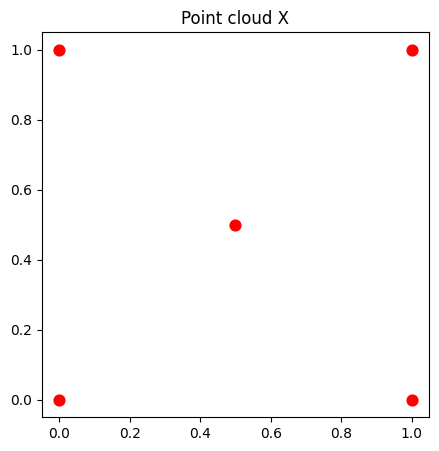

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 0], [1, 0], [0, 1], [1, 1], [1/2,1/2]])

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c='red', s=60)
plt.title("Point cloud X")
plt.show()

#### Simplicial filtrations
Let us compute its Vietoris-Rips filtration:

In [5]:
import gudhi as gd

# Vietoris-Rips Complex Example
# Construct a Vietoris-Rips complex from the point cloud X
rips_complex = gd.RipsComplex(points=X, max_edge_length=2.0)
rips_simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

print("Vietoris-Rips Complex:")
for simplex in rips_simplex_tree.get_simplices():
    print(simplex)

Vietoris-Rips Complex:
([0, 1, 2], 1.4142135623730951)
([0, 1, 3], 1.4142135623730951)
([0, 1, 4], 1.0)
([0, 1], 1.0)
([0, 2, 3], 1.4142135623730951)
([0, 2, 4], 1.0)
([0, 2], 1.0)
([0, 3, 4], 1.4142135623730951)
([0, 3], 1.4142135623730951)
([0, 4], 0.7071067811865476)
([0], 0.0)
([1, 2, 3], 1.4142135623730951)
([1, 2, 4], 1.4142135623730951)
([1, 2], 1.4142135623730951)
([1, 3, 4], 1.0)
([1, 3], 1.0)
([1, 4], 0.7071067811865476)
([1], 0.0)
([2, 3, 4], 1.0)
([2, 3], 1.0)
([2, 4], 0.7071067811865476)
([2], 0.0)
([3, 4], 0.7071067811865476)
([3], 0.0)
([4], 0.0)


Let us do the same with the Alpha complex:

In [6]:
# Alpha Complex Example
# Construct an Alpha complex from the same point cloud X
alpha_complex = gd.AlphaComplex(points=X)
alpha_simplex_tree = alpha_complex.create_simplex_tree()

print("\nAlpha Complex:")
for simplex in alpha_simplex_tree.get_simplices():
    print(simplex)


Alpha Complex:
([0, 1, 4], 0.25)
([0, 1], 0.25)
([0, 2, 4], 0.25)
([0, 2], 0.25)
([0, 4], 0.125)
([0], 0.0)
([1, 3, 4], 0.25)
([1, 3], 0.25)
([1, 4], 0.125)
([1], 0.0)
([2, 3, 4], 0.25)
([2, 3], 0.25)
([2, 4], 0.125)
([2], 0.0)
([3, 4], 0.125)
([3], 0.0)
([4], 0.0)


#### Persistence barcodes

In [12]:
# Compute persistence for Vietoris-Rips filtration
rips_simplex_tree.compute_persistence()
print("Persistence intervals for Vietoris-Rips filtration (dimension 0):\n", rips_simplex_tree.persistence_intervals_in_dimension(0))

Persistence intervals for Vietoris-Rips filtration (dimension 0):
 [[0.         0.70710678]
 [0.         0.70710678]
 [0.         0.70710678]
 [0.         0.70710678]
 [0.                inf]]


In [13]:
# Compute persistence for Alpha filtration
alpha_simplex_tree.compute_persistence()
print("\nPersistence intervals for Alpha filtration (dimension 0):\n", alpha_simplex_tree.persistence_intervals_in_dimension(0))


Persistence intervals for Alpha filtration (dimension 0):
 [[0.    0.125]
 [0.    0.125]
 [0.    0.125]
 [0.    0.125]
 [0.      inf]]


#### Persistence diagrams

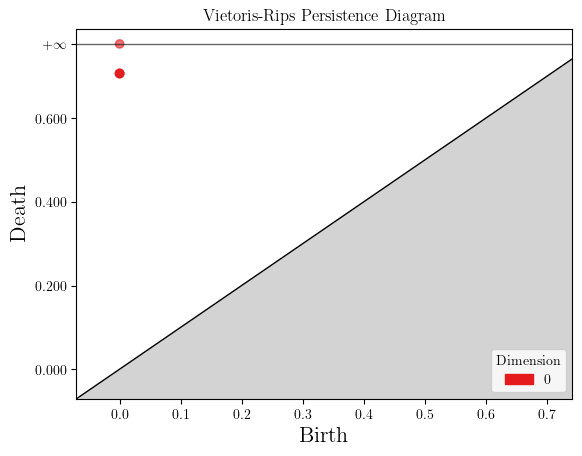

In [16]:
gd.plot_persistence_diagram(rips_simplex_tree.persistence())
plt.title("Vietoris-Rips Persistence Diagram")
plt.show()

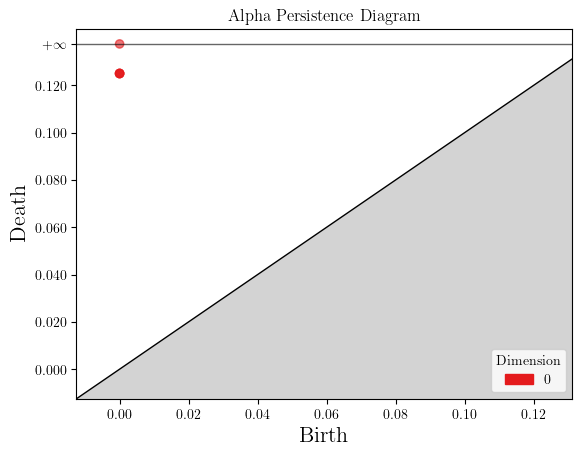

In [18]:
gd.plot_persistence_diagram(alpha_simplex_tree.persistence())
plt.title("Alpha Persistence Diagram")
plt.show()

# Challenges
### Challenge 1
1. Compute the Vietoris-Rips and Alpha filtrations of 1000 points uniformly sampled on the unit square of $\R^2$.
2. Compare the two filtrations.
3. Compute the persistence barcodes of this filtration and plot it as a persistence diagram.
4. Interpret what you see.
5. Do exactly the same in $\R^3$ and $\R^8$.

### Challenge 2
1. Compute the Vietoris-Rips filtration of points uniformly sampled on the unit circle of $\R^2$.
2. Compute the persistence diagram of this filtration.
3. Add radial noise to it, and interpret what you see.

### Challenge 3
Compare the persistence barcodes associated with Alpha filtrations of the following two different sampling on the torus.

In [ ]:
def gen_torus_unif(n_pts, noise=0, a=(1,1), c=(2,2)): 
	'''
	Draw n_pts uniformly at random on a torus of radii chosen at uniformly random in the intervals (a[0], a[1]) and (c[0], c[1]) respectively. A uniform noise of size noise is added to the points.
	'''
	a = a[0]+(a[1]-a[0])*np.random.rand() 
	c = c[0]+(c[1]-c[0])*np.random.rand()
	X = np.zeros((n_pts, 3))
	n_filled = 0
	while n_filled <n_pts:
		theta = np.random.uniform(0, 2*np.pi)
		eta = np.random.uniform(0, 1/np.pi)
		fx = (1+(a/c)*np.cos(theta))/(2*np.pi)
		if eta < fx:
			phi = np.random.uniform(0, 2*np.pi)
			X[n_filled] = [(c+a*np.cos(theta))*np.cos(phi),(c+a*np.cos(theta))*np.sin(phi), a*np.sin(theta)]
			n_filled+=1
	return X + noise*np.random.randn(*X.shape)

def gen_torus_non_unif(n_pts, noise=0, a=(1,1), c=(2,2)): #torus has random sizes drawn in a and c intervals
	'''
	Draw n_pts on a torus of radii chosen at uniformly random in the intervals (a[0], a[1]) and (c[0], c[1]) respectively. The points are drawn in toroidal coordinates with angles chosen uniformly at random. A uniform noise of size noise is added to the points.
	'''
	a = a[0]+(a[1]-a[0])*np.random.rand() 
	c = c[0]+(c[1]-c[0])*np.random.rand()
	theta = np.random.uniform(0, 2*np.pi, size = n_pts)
	phi = np.random.uniform(0,2*np.pi, size = n_pts)
	X = np.zeros((n_pts, 3))
	X[:,0] = (c+a*np.cos(theta))*np.cos(phi)
	X[:,1] = (c+a*np.cos(theta))*np.sin(phi)
	X[:,2] = a*np.sin(theta)
	return X + noise*np.random.randn(*X.shape)


In [ ]:
# Generate the samples
n_pts = 1000
torus_unif = gen_torus_unif(n_pts)
torus_non_unif = gen_torus_non_unif(n_pts)

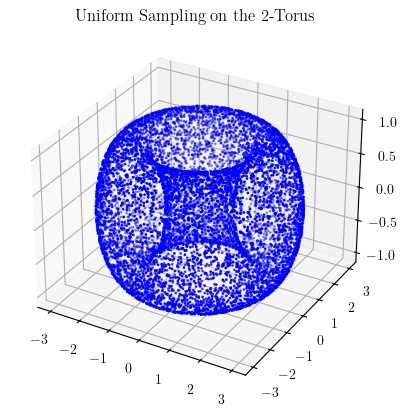

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(torus_unif[:, 0], torus_unif[:, 1], torus_unif[:, 2], s=1, c='blue')
ax.set_title("Uniform Sampling on the 2-Torus")
plt.show()

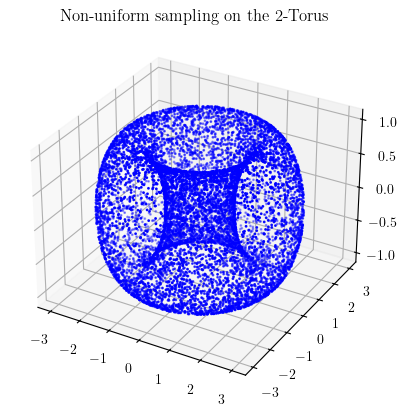

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(torus_non_unif[:, 0], torus_non_unif[:, 1], torus_non_unif[:, 2], s=1, c='blue')
ax.set_title("Non-uniform sampling on the 2-Torus")
plt.show()

# Further reading
I highly recommend the tutorials from the Gudhi library available online [here](https://github.com/GUDHI/TDA-tutorial/). For instance:
- If you want to learn more on Alpha complexes, see [here](https://github.com/VincentRouvreau/GUDHI_presentation-NIPS_2017/blob/master/Alpha_complex.ipynb).
- And to plot Alpha complexes on examples, it's [here](https://github.com/GUDHI/TDA-tutorial/blob/master/Tuto-GUDHI-alpha-complex-visualization.ipynb).
- A whole tutorial on persistence diagrams [here](https://github.com/GUDHI/TDA-tutorial/blob/master/Tuto-GUDHI-persistence-diagrams.ipynb).
